# Testing Clustering on Dataframe

We load the Dataframe using code found in stackoverflow("http://stackoverflow.com/questions/8955448/save-load-scipy-sparse-csr-matrix-in-portable-data-format") and apply clustering algorithms on them

# Testing Kmeans with 10 clusters

In [25]:
import scipy.sparse
import numpy as np
import sklearn as skl
import pylab as plt

%matplotlib inline

In [2]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    return scipy.sparse.csr_matrix((  loader['data'], loader['indices'], loader['indptr']),
                         shape = loader['shape'])

In [4]:
Dataframe=load_sparse_csr("Dataframe.npz")

In [5]:
from sklearn.cross_validation import train_test_split

In [6]:
train_Dat,test_Dat=train_test_split(Dataframe,test_size=0.2,random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [10]:
clust=KMeans(n_clusters=10)

In [11]:
Dat=train_Dat.toarray()

In [12]:
clusters=clust.fit_predict(Dat)

In [13]:
print clusters[0:10]

[6 6 9 3 6 9 1 0 1 1]


In [18]:
cluster_freq=np.zeros(10,dtype=float)
for i in clusters:
    cluster_freq[i]+=1
print map(int,cluster_freq)

[7065, 7141, 1, 5515, 1, 3075, 5281, 16, 1, 5532]


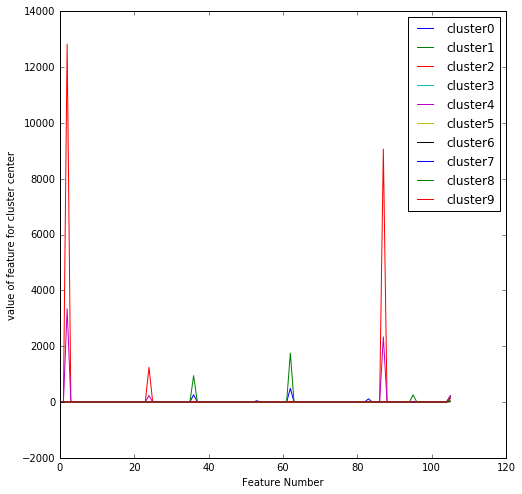

In [36]:
plt.figure(figsize=(8,8))
for i in range(10):
    plt.plot(np.arange(len(Dat[0])),clust.cluster_centers_[i],label="cluster"+str(i))
plt.xlabel("Feature Number")
plt.ylabel("value of feature for cluster center")
plt.legend()
    

We can see that only 6 of the clusters have significant occupancies. So we are probably better off with a differentclusters. Also, the cluster centers for the 4 clusters with very low occupancies have completely nonsensical coordinates, which can be seen by the diverging spikes on the above plot.

# Testing Kmeans with different number of clusters

In [44]:
Dat=Dataframe.toarray()

In [51]:
print "Number of clusters  Number of points in each cluster   Inertia"
for nclt in range(2,20):
    clust2=KMeans(n_clusters=nclt)
    clusters2=clust2.fit_predict(Dat)
    cluster_freq=np.zeros(nclt,dtype=float)
    for i in clusters2:
        cluster_freq[i]+=1
    print nclt,map(int,cluster_freq),clust2.inertia_

Number of clusters  Number of points in each cluster   Inertia
2 [42034, 1] 279748149.77
3 [15816, 26218, 1] 83224549.0066
4 [15487, 15697, 1, 10850] 57812493.482
5 [10851, 15487, 1, 15695, 1] 41153547.3387
6 [15695, 8954, 1, 10761, 6623, 1] 31349146.1056
7 [8953, 1, 15682, 6615, 1, 10761, 22] 22525477.2969
8 [10007, 8941, 1, 7036, 1, 6615, 9412, 22] 18038219.0243
9 [6615, 9412, 1, 7035, 8941, 1, 10007, 1, 22] 16002830.0671
10 [6909, 1, 8931, 6846, 1, 22, 3949, 6615, 1, 8760] 14439433.4605
11 [3875, 1, 8927, 6921, 6615, 1, 7, 6907, 21, 8759, 1] 13463506.6422
12 [6846, 8927, 1, 6908, 1, 6615, 7, 8757, 3949, 1, 21, 2] 12742964.7604
13 [20, 6921, 1, 6905, 6612, 1, 7, 8750, 1, 3875, 8923, 13, 6] 11792216.769
14 [8292, 3875, 1, 6528, 8750, 1, 6645, 7, 6, 13, 6920, 20, 1, 976] 11272291.9306
15 [6608, 6847, 1, 2403, 8853, 1, 8749, 14, 1, 1, 5, 7, 3912, 4607, 26] 11129798.7264
16 [8259, 6847, 1, 2309, 1, 6503, 8751, 13, 1, 3912, 7, 4607, 6, 5, 61, 752] 10633378.4189
17 [6920, 7952, 1, 1, 6645,

Lets see what is going on with 10 clusters

In [91]:
nclt=10
clust2=KMeans(n_clusters=nclt,n_init=50,random_state=42)
clusters2=clust2.fit_predict(Dat)
cluster_freq=np.zeros(nclt,dtype=float)
for i in clusters2:
    cluster_freq[i]+=1
print nclt,map(int,cluster_freq),clust2.inertia_

10 [8759, 6615, 1, 3876, 1, 28, 8927, 6920, 1, 6907] 14477970.1895


Some of the clusters always end up almost empty. Basically the Kmeans algorithm is failing. Still let us look at the cluster centers of the well populated clusters

Let's see what the spaceGroup numbers are of the cluster center points.

In [94]:
print clust2.cluster_centers_[:,105]

[ 223.46318073   13.62282691  216.          166.89680083  216.
  136.92857143   64.3710093   193.10823699   14.          135.19791516]


Lets plot the cluster centers in stoichiometric space. We dont plot clusters with low occupancy as those have garbage values.

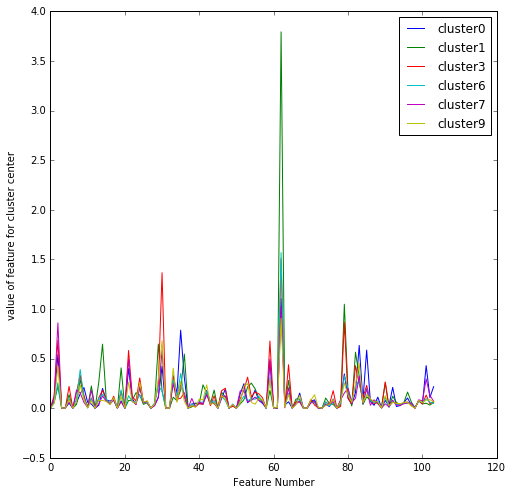

In [95]:
plt.figure(figsize=(8,8))
num_x=104
for i in range(10):
    if i not in [2,4,5,8]:
        plt.plot(np.arange(num_x),clust2.cluster_centers_[i][0:num_x],label="cluster"+str(i))
plt.xlabel("Feature Number")
plt.ylabel("value of feature for cluster center")
plt.legend()

In [88]:
nclt=10
clust3=KMeans(n_clusters=nclt,n_init=50,random_state=42)
X_new=clust3.fit_transform(Dat)

In [89]:
print X_new[0]

[  1.25560223e+01   2.02660795e+02   1.57553809e+04   5.01453102e+01
   4.08228635e+03   5.10524084e+02   1.51965009e+02   2.50169205e+01
   2.01670052e+03   8.14250818e+01]


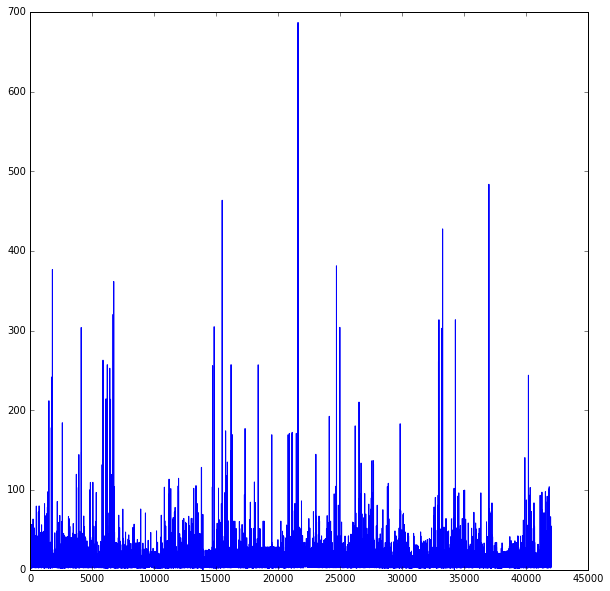

In [90]:
#min_dist=zeros(len(X_new))
plt.figure(figsize=(10,10))
min_dist=np.amin(X_new,axis=1)
plt.plot(np.arange(len(X_new)),min_dist)

In [108]:
nclt=50
clust4=KMeans(n_clusters=nclt,n_init=10,init='random',random_state=42)
clusters4=clust4.fit_predict(Dat)
cluster_freq=np.zeros(nclt,dtype=float)
for i in clusters4:
    cluster_freq[i]+=1
print nclt,map(int,cluster_freq),clust4.inertia_

50 [133, 4, 8, 137, 3030, 1045, 45, 24, 3, 5523, 100, 1, 930, 1, 13, 863, 679, 2568, 857, 707, 310, 5, 1, 1, 803, 727, 131, 120, 42, 11, 108, 131, 6633, 2739, 135, 100, 4, 128, 3680, 7, 21, 3105, 6, 56, 13, 2618, 112, 2264, 22, 1331] 8286089.29686


In [113]:
print(clust4.cluster_centers_[:,105])

[  10.57894737  141.75         12.625       161.91240876  194.15016502
   12.78373206   14.95555556  203.16666667  212.33333333  225.88683686
  191.76         40.            2.55376344  216.          225.07692308
   36.53997683  136.48600884  165.04088785  148.36406068   88.04950495
  166.44193548  178.2         216.           59.          175.81818182
  204.30123796  223.98473282  221.46666667   48.16666667   70.36363636
  173.65740741  194.45038168   61.23081562  218.64695144   12.0962963
  197.46        153.75        220.5390625    13.45461957  110.57142857
  184.          139.50241546  219.          220.125        31.30769231
  189.27272727  202.21428571  124.75176678  158.63636364   71.70924117]
